In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [235]:
df = pd.read_csv('./kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [236]:
X = df['sqft_living'][:100]
y = df['price'][:100]

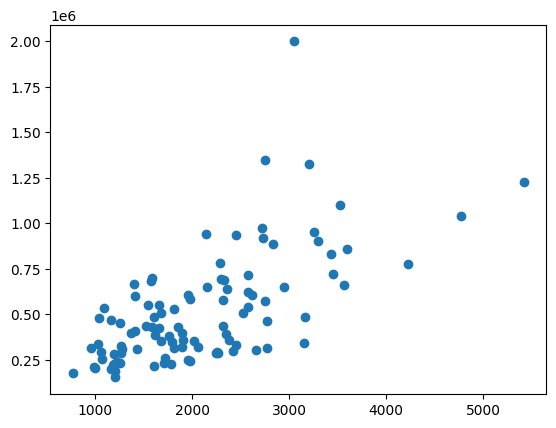

In [237]:
plt.scatter(X,y)

In [238]:
X = np.array(X)
y = np.array(y).astype('int32')
print(X)
print(y)

[1180 2570  770 1960 1680 5420 1715 1060 1780 1890 3560 1160 1430 1370
 1810 2950 1890 1600 1200 1250 1620 3050 2270 1070 2450 1710 2450 1400
 1520 2570 2320 1190 2330 1090 2060 2300 1660 2360 1220 2620 2570 4220
 3595 1570 1280 3160  990 2290 1250 2753 1190 3150 1410 1980 2730 2830
 2250 2420 3250 1850 2150 1260 2519 1540 1660 2770 2720 2240 1000 3200
 4770 1260 2750 2380 1790 3430 1760 1040 1410 3450 2350 1900 2020 1680
  960 2140 2660 2770 1610 1030 1980 3520 1200 1580 1580 3300 1960 1160
 1810 2320]
[ 221900  538000  180000  604000  510000 1225000  257500  291850  229500
  323000  662500  468000  310000  400000  530000  650000  395000  485000
  189000  230000  385000 2000000  285000  252700  329000  233000  937000
  667000  438000  719000  580500  280000  687500  535000  322500  696000
  550000  640000  240000  605000  625000  775000  861990  685000  309000
  488000  210490  785000  450000 1350000  228000  345000  600000  585000
  920000  885000  292500  301000  951000  430000  650

In [239]:
def linearModel(X,w,b):
  """
    X: features
    y: target
    w: slope(weight)
    b: intercept(bias)
  """
  f_x = []
  for i in range(len(X)):
    y = w*X[i] + b
    f_x.append(y)

  return f_x


In [240]:
def costFunction(X,y,y_hat):
  """
    X: features
    y: target
    y_hat = predicted values
    m: number of traning examples
    w: slope(weight)
    b: intercept(bias)
  """
  J_wb = 0
  sum = 0
  m = len(X)
  for i in range(len(y)):
    error = y_hat[i] - y[i]
    sq_error = error*error
    sum +=sq_error
  J_wb = sum/(2*m)
  return J_wb

In [241]:
# printing cost for various linear models
w = [100,120,140,160,180,200,220,240,260,280]
b = [-1,0,1,2,3,4,5,6,7,8]
total_cost = []
w_track = []
b_track = []

min_cost = float('inf')  # Initialize with a large value
min_w = None
min_b = None

for i in range(10):
  for j in range(10):
    y_hat = linearModel(X,w[i],b[i])
    cost = costFunction(X,y,y_hat)
    total_cost.append(int(cost))
    w_track.append(w[i])
    b_track.append(b[i])

    if cost < min_cost:
      min_cost = cost
      min_w = w[i]
      min_b = b[j]

In [242]:
cost_array = np.array(total_cost)
print(np.min(cost_array))
print(min_w)
print(min_b)


26663971077
240
-1


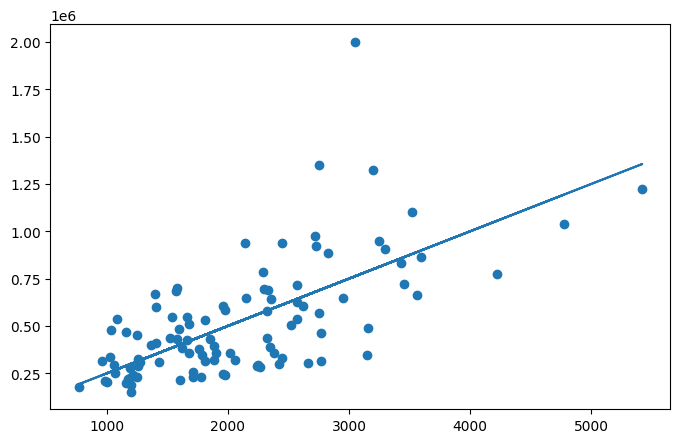

In [243]:
figure = plt.figure(figsize=(8,5))
plt.plot(X,linearModel(X,250,0))
plt.scatter(X,y)
plt.show()

In [244]:
def plotLineCost(w_track,cost_array):
  figure = plt.figure(figsize=(8,5))
  plt.plot(w_track,total_cost)
  plt.xlabel('w')
  plt.ylabel('J(w)')
  plt.show()

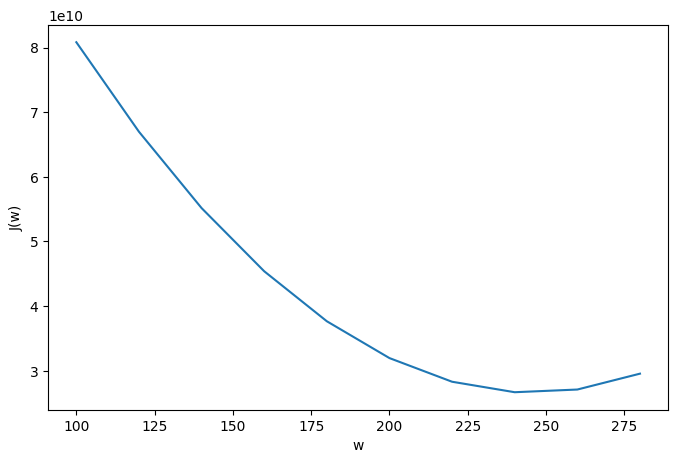

In [245]:
plotLineCost(w_track,cost_array)